# Домашнее задание «Визуализация данных»

### Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
import seaborn as sns

In [2]:
print(pd.__version__)

1.1.5


In [8]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [12]:
df_netflix = pd.read_csv('netflix_titles.csv')

In [6]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
df_netflix.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


## 1. Построи график "Динамика выпуска контента по годам"

In [11]:
dynamics_ = df_netflix[['show_id'] + ['release_year']].groupby('release_year').count()
dynamics_

,show_id
release_year,
1925,1
1942,2
1943,3
1944,3
1945,3
...,...
2016,830
2017,959
2018,1063


Text(0, 0.5, 'Видео-контент, ед.')

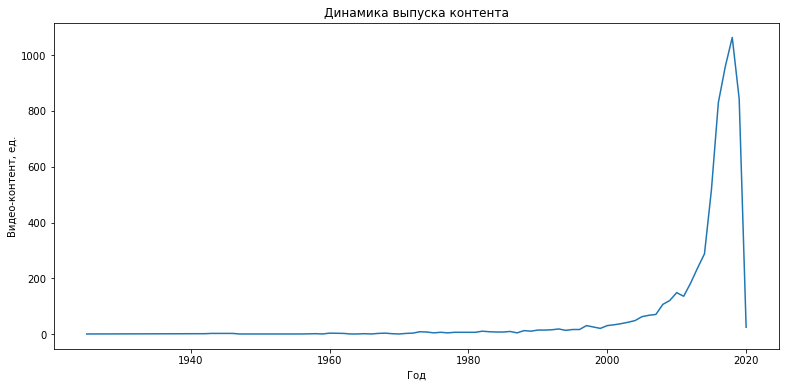

In [13]:
plt.plot(dynamics_.index, dynamics_.show_id)
plt.title('Динамика выпуска контента')
plt.xlabel('Год')
plt.ylabel('Видео-контент, ед.')

<AxesSubplot:title={'center':'Динамика выпуска контента'}, xlabel='Год', ylabel='Видео-контент, ед.'>

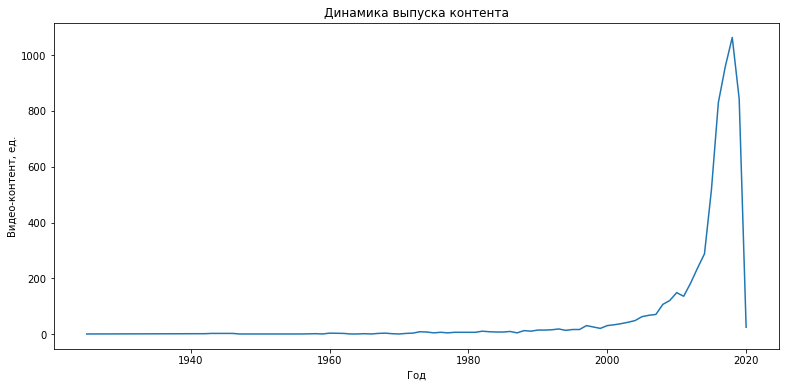

In [14]:
dynamics_['show_id'].plot(title='Динамика выпуска контента', 
                                        xlabel='Год', 
                                        ylabel='Видео-контент, ед.')

По данному графику мы можем отследаить динамику выпуска различного видеоконтента. Результат конечно и так интуитивно понятен. Видим, что начиная с 2000-х годов идет экспоненциальный рост кол-ва выпускаемого контента и этот рост продолжается. Резкиое падение на графике в 2019-20 годах возникло из-за вероятно из-за двух фаторов: недостатка данных и, возможно, пандемии.  

## 2. Построим стоблчатую диаграмму отображающую количества фильмов и тв-шоу по годам

In [15]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [16]:
df_movie_1 = df_netflix[(df_netflix.type == "Movie")].groupby('release_year').count()
df_movie_2 = df_movie_1[['type']].tail(20)
df_movie_2.rename(columns={'type': 'movie'}, inplace=True)

df_tvshow_1 = df_netflix[(df_netflix.type == "TV Show")].groupby('release_year').count()
df_tvshow_2 = df_tvshow_1[['type']].tail(20)
df_tvshow_2.rename(columns={'type': 'tv_show'}, inplace=True)

df_tvshow_movie = df_tvshow_2.merge(df_movie_2, on='release_year') 
df_tvshow_movie

,tv_show,movie
release_year,,
2001,4,30
2002,3,35
2003,8,35
2004,9,40
2005,12,51
2006,9,59
2007,11,60
2008,20,87
2009,34,87


<AxesSubplot:xlabel='release_year'>

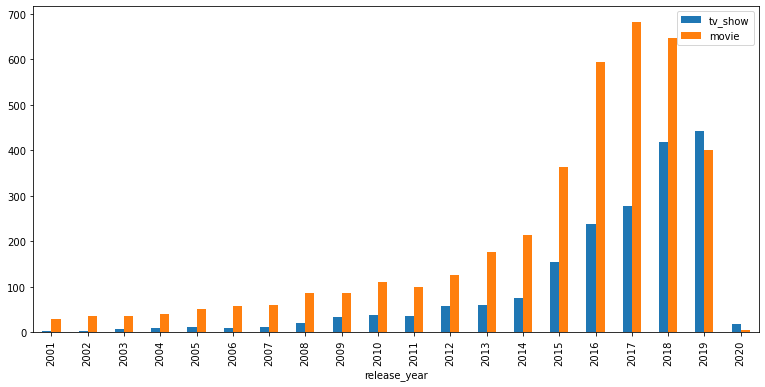

In [17]:
df_tvshow_movie.plot(kind='bar')

По данной визуализации мы можен наглядно отследить изменения соотношения фильмов и тв-шоу за последние 20 лет. Можем обратить внимание, что в 2017 году было выпущено больше всего фильмов и после количество фильмов имеет тенденцию к снижению,  а кол-во шоу продолжает рост. 20 год не является показатеельным из-за нехватки данных. 

### Дальнейшие визуализации построим на примере датасета из предыдущего домашнего задания (данные о состоянии здоровья лошадей), так как датафрейм с информацией о видео на ютубе имеет мало количественных показателей. Другие датафреймы из kaggle.com нет возможности скачать. 

In [18]:
colnames=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28] 
horse_colic_database = pd.read_csv('horse_data.csv', names = colnames, header=None, na_values='?')
my_horse_colic_database = horse_colic_database.iloc[:, [0,1,3,4,5,6,7,8]]
my_horse_colic_database_2 = my_horse_colic_database.set_axis([
    '_1_Surgery', 
    '_2_Age',
    '_4_Temperature',
    '_5_Pulse',
    '_6_Respiratory_rate',
    '_7_Temperature_of_extremities',
    '_8_Peripheral_pulse',
    '_9_Mucous_membranes',
], axis=1, inplace=False)
my_horse_colic_database_2

,_1_Surgery,_2_Age,_4_Temperature,_5_Pulse,_6_Respiratory_rate,_7_Temperature_of_extremities,_8_Peripheral_pulse,_9_Mucous_membranes
0,2.0,1,38.5,66.0,28.0,3.0,3.0,NaN
1,1.0,1,39.2,88.0,20.0,NaN,NaN,4.0
2,2.0,1,38.3,40.0,24.0,1.0,1.0,3.0
3,1.0,9,39.1,164.0,84.0,4.0,1.0,6.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,NaN,4.0
296,2.0,1,37.2,72.0,24.0,3.0,2.0,4.0
297,1.0,1,37.5,72.0,30.0,4.0,3.0,4.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,3.0


## 3. Построим визуализацию типа Boxplot для показателя Pulse

<AxesSubplot:title={'center':'horses pulses distribution'}>

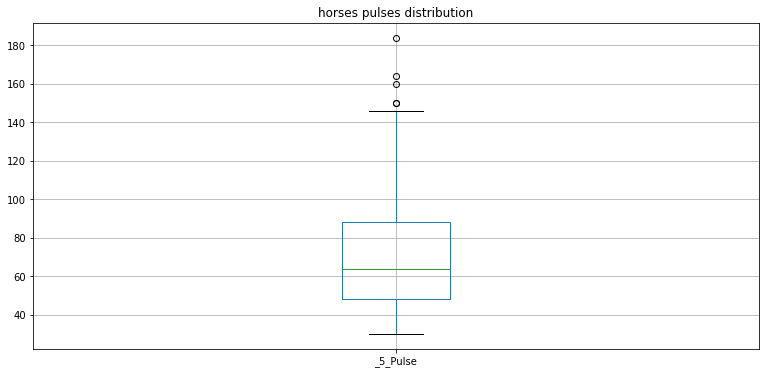

In [19]:
df_horses_pulse = my_horse_colic_database_2['_5_Pulse']

df_horses_pulse.plot(kind='box',
                   title='horses pulses distribution' , grid = True)

Выводы, которые можно сделать из данной визуализации:
- медианное значение находится на уровне примерно 63
- 25-й процентиль находится на уровне примерно 48
- 75-й прцоентиль находтся на уроне примерно 88
- видим, что нет нижних выбросов, но есть верхние и их не очень много (всего 4) 
- верхний ус длиннее => распределение скошено (по гистограмме) скошено влево

<AxesSubplot:xlabel='_1_Surgery', ylabel='_5_Pulse'>

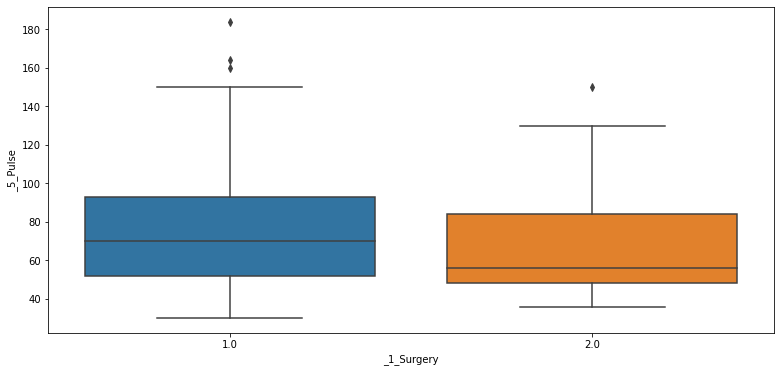

In [53]:
sns.boxplot(x= '_1_Surgery' , y='_5_Pulse', 
            data=my_horse_colic_database_2)

1 - взросыле особоби,
2 - молодые особи

Построив два боксплота распределения значений пульса для молодых животных и для взрослых мы видим, что медианное значение пульса для взрослых особей больше, чем для молодых. Так же вилимо, что (1) имеет большые усы как вниз, так и вверх. И большее количество выбросов.  

### 4. Построим точечную диаграмму и оценим корреляцию показателей Pulse и Respiratory_rate

<AxesSubplot:title={'center':'Correlation between Pulse and Respiratory_rate'}, xlabel='_6_Respiratory_rate', ylabel='_5_Pulse'>

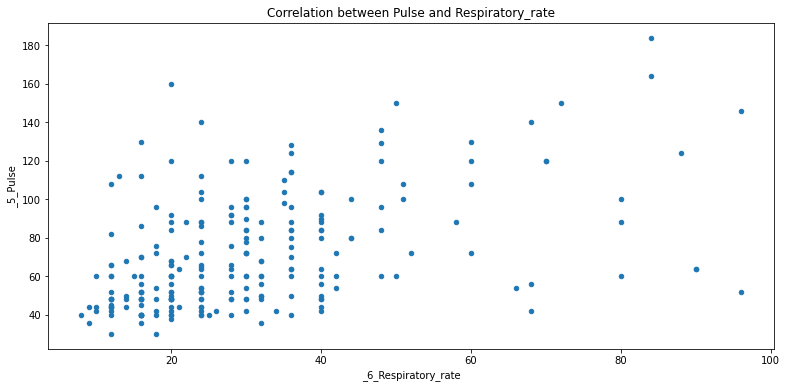

In [88]:
my_horse_colic_database_2.plot(kind='scatter', 
        x='_6_Respiratory_rate',  
        y='_5_Pulse', 
        title='Correlation between Pulse and Respiratory_rate')

Можно сказать, что корреляции нет. Или слабовыраженная прямая корреляция. 